In [21]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ipynb.fs.full.TwentyOneStatesThreeStarts import EM_iter

# Simulation Data

In [2]:
def generate_nb(state):
    '''
    Given the state, generate the NB distribution
    state: int
    '''
    return np.random.negative_binomial(alpha_list_true[state-1], beta_list_true[state-1]/(1+beta_list_true[state-1]))

In [3]:
def simulate_1_11(curr_RNA, curr_observed, state_list, count, curr_state):
    '''
    Simulate for untranslated region
    '''
    # check if AUG would occur
    start = random.choices([True, False], weights=np.ones(2), k = 1)[0]    
    while start == False:      
        
        # if no, generate single base
        curr_RNA += random.choices(['A', 'C', 'G', 'U'], weights=np.ones(4), k = 1)[0]
        curr_observed.append(generate_nb(curr_state))
        state_list.append(curr_state)
        count += 1
        start = random.choices([True, False], weights=np.ones(2), k = 1)[0] # check if AUG occurs
        
        # if last three element is 'AUG', remove the current RNA, observed data
        if "".join(curr_RNA[-3:]) == 'AUG':
            curr_RNA = curr_RNA[:-3]
            curr_observed = curr_observed[:-3]
            state_list = state_list[:-3]
            count -= 3
            start = True
        
        if count >= 100:
            return (curr_RNA, curr_observed, state_list, count)
    
    return (curr_RNA, curr_observed, state_list, count)

In [4]:
def simulate():
    '''
    Simulate one single RNA sequence
    '''
    
    # count occurances
    state_1_2 = 0
    state_1_12 = 0
    state_11_12 = 0
    change_position = 0
    
    # Assume three start codons
    state_list = []
    
    # first five without start codons
    curr_RNA = random.choices(['A', 'C', 'G', 'U'], weights=np.ones(4), k = 5)
    while 'AUG' in "".join(curr_RNA):
        curr_RNA = random.choices(['A', 'C', 'G', 'U'], weights=np.ones(4), k = 5)
    curr_observed = [generate_nb(1), generate_nb(1), generate_nb(1), generate_nb(1), generate_nb(1)]
    state_list = [1, 1, 1, 1, 1]
    count = 5
    state = 1

    # if in state 1
    while state == 1:
        curr_RNA, curr_observed, state_list, count = simulate_1_11(curr_RNA, curr_observed, state_list, count, 1)
            
        if count >= 100:
            return (curr_RNA, curr_observed, [state_1_2, state_1_12, state_11_12], change_position, state_list)
        
        curr_RNA += ['A', 'U', 'G']
        count += 3
        state = random.choices([1, 2, 12], weights=[0.2, 0.5, 0.3], k = 1)[0]
        
        if state == 1:
            curr_observed += [generate_nb(1), generate_nb(1), generate_nb(1)] # NB for AUG
            state_list += [1, 1, 1]
        
        
    if state == 12:
        state_1_12 = 1     
          
    # if in state 2
    if state == 2:
        state_1_2 = 1  
        
        # uORF
        curr_observed += [generate_nb(2), generate_nb(3), generate_nb(4)]
        state_list += [2, 3, 4]
    
        repeat = random.choices(np.arange(20, 31), weights=np.ones(11), k = 1)[0]
        for i in range(repeat-2):
            curr_RNA += random.choices([['A', 'U', 'G'], ['G', 'U', 'U'], ['U', 'U', 'U']], weights=[0.5, 0.25, 0.25], k = 1)[0]
            curr_observed += [generate_nb(5), generate_nb(6), generate_nb(7)]
            state_list += [5, 6, 7]
            count += 3
        curr_RNA += random.choices([['U', 'A', 'A'], ['U', 'G', 'A'], ['U', 'A', 'G']], weights=[1, 1, 1], k = 1)[0]
        curr_observed += [generate_nb(8), generate_nb(9), generate_nb(10)]
        state_list += [8, 9, 10]
        count += 3
        
        # UTR
        temp = random.choices(['A', 'C', 'G', 'U'], weights=np.ones(4), k = 5)
        while 'AUG' in "".join(temp):
            temp = random.choices(['A', 'C', 'G', 'U'], weights=np.ones(4), k = 5) 
        curr_RNA += temp
        curr_observed += [generate_nb(11), generate_nb(11), generate_nb(11), generate_nb(11), generate_nb(11)]
        state_list += [11, 11, 11, 11, 11]
        count += 5
        change_position = len(curr_RNA)   
        state = 11  
        

        while state == 11:
            curr_RNA, curr_observed, state_list, count= simulate_1_11(curr_RNA, curr_observed, state_list, count, 11)
            
            if count >= 100:
                return (curr_RNA, curr_observed, [state_1_2, state_1_12, state_11_12], change_position, state_list)
            
            curr_RNA += ['A', 'U', 'G']
            count += 3
            state = random.choices([11, 12], weights=[0.2, 0.8], k = 1)[0]

            if state == 11:
                curr_observed += [generate_nb(11), generate_nb(11), generate_nb(11)]
                state_list += [11, 11, 11]
            elif state == 12:
                state_11_12 = 1  
                        
    # main ORF
    if state == 12:
        curr_observed += [generate_nb(12), generate_nb(13), generate_nb(14)]
        state_list += [12, 13, 14]
        repeat = random.choices(np.arange(30, 51), weights=np.ones(21), k = 1)[0]
        for i in range(repeat-2):
            curr_RNA += random.choices([['A', 'U', 'G'], ['G', 'U', 'U'], ['U', 'U', 'U']], weights=[0.5, 0.25, 0.25], k = 1)[0]
            curr_observed += [generate_nb(15), generate_nb(16), generate_nb(17)]
            state_list += [15, 16, 17]
            count += 3
        curr_RNA += random.choices([['U', 'A', 'A'], ['U', 'G', 'A'], ['U', 'A', 'G']], weights=[1, 1, 1], k = 1)[0]
        curr_observed += [generate_nb(18), generate_nb(19), generate_nb(20)]
        state_list += [18, 19, 20]
        count += 3

    
        repeat = random.choices(np.arange(20, 31), weights=np.ones(11), k = 1)[0]
        for i in range(repeat-2):
            curr_RNA += random.choices(['A', 'C', 'G', 'U'], weights=np.ones(4), k = 1)[0]
            curr_observed.append(generate_nb(21))
            state_list.append(21)
            count += 1

      
    return (curr_RNA, curr_observed, [state_1_2, state_1_12, state_11_12], change_position, state_list)

In [5]:
def simulate_sequences(length):
    '''
    uORF + main ORF + both
    ''' 
    count_list = [0, 0 ,0]
    RNA_data = []
    observed_data = []
    count_state = 0
    state_list_true = []
    for i in range(length):
        temp = simulate()
        
        count_list[0] += temp[2][0]
        count_list[1] += temp[2][1]
        count_list[2] += temp[2][2]
        change_position = temp[3]
        state_list = temp[4]
        
        # change to only main ORF
        if temp[2][0] == 1 and temp[2][2] == 1:
            curr_observed = []
            state_list = []
            count_state += 1
            if count_state == 3:
                count_state = 0
                repeat = random.choices(np.arange(40, 81), weights=np.ones(41), k = 1)[0]
                curr_RNA = random.choices(['A', 'C', 'G', 'U'], weights=np.ones(4), k = repeat)
                for i in range(repeat):
                    curr_observed.append(generate_nb(11))
                    state_list.append(11)
                while 'AUG' in "".join(curr_RNA):
                    get_index = ("".join(curr_RNA)).index('AUG')
                    curr_RNA[get_index] = random.choices(['C', 'G', 'U'], weights=np.ones(3), k = 1)[0]
                temp[0][change_position:] = curr_RNA
                temp[1][change_position:] = curr_observed
                temp[4][change_position:] = state_list
                count_list[2] -= temp[2][2]
               
        RNA_data.append(temp[0])
        observed_data.append(temp[1])
        state_list_true.append(temp[4])
    
    return (RNA_data, observed_data, count_list, state_list_true)

In [7]:
def simulate_neither(length):
    '''
    Untranslated region
    '''
    RNA_data = []
    observed_data = []
    state_list_true = []
    for num in range(length):
        curr_observed = []
        curr_state = []
        repeat = random.choices(np.arange(40, 81), weights=np.ones(41), k = 1)[0]
        curr_RNA = random.choices(['A', 'C', 'G', 'U'], weights=np.ones(4), k = repeat)
        for i in range(repeat):
            curr_observed.append(generate_nb(1))
            curr_state.append(1)
        while 'AUG' in "".join(curr_RNA):
            get_index = ("".join(curr_RNA)).index('AUG')
            curr_RNA[get_index] = random.choices(['C', 'G', 'U'], weights=np.ones(3), k = 1)[0]
        RNA_data.append(curr_RNA)
        observed_data.append(curr_observed)
        state_list_true.append(curr_state)
    return (RNA_data, observed_data, state_list_true)

# Generate Data

In [8]:
# Give values
mean_list_true = np.array([80, 350, 300, 250, 200, 150, 120, 320, 250, 220, 80, 450, 400, 300, 250, 230, 100, 430, 350, 320, 80]) # mean
variance_list_true = mean_list_true*1.2 
beta_list_true = 1/(variance_list_true/mean_list_true-1)
alpha_list_true = mean_list_true * beta_list_true

# Simulate
random.seed(0)
part1 = simulate_sequences(2700) 
part2 = simulate_neither(300)  
RNA_data = part1[0] + part2[0]
observed_data = part1[1] + part2[1]
state_list_true = part1[3] + part2[2]

# shuffle data
c = list(zip(RNA_data, observed_data, state_list_true))
random.shuffle(c)
RNA_data, observed_data, state_list_true = zip(*c)

In [9]:
E = list(np.repeat(1, 3000)) 
stop_codon_list = ['UAA', 'UGA', 'UAG']

# Data Plots

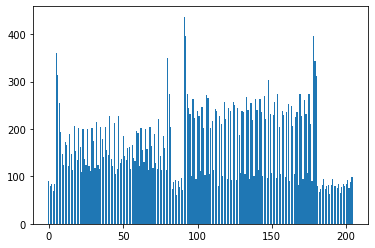

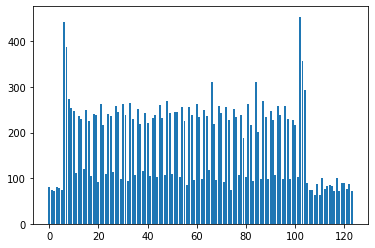

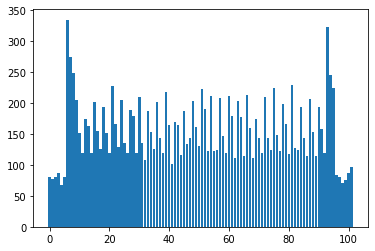

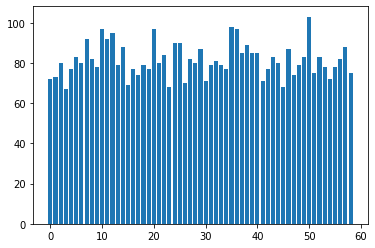

In [17]:
# both
plt.bar(np.arange(len(observed_data[2])), observed_data[2])
plt.show()
# only main coding region
plt.bar(np.arange(len(observed_data[0])), observed_data[0])
plt.show()
# only uORF
plt.bar(np.arange(len(observed_data[5])), observed_data[5])
plt.show()
# none
plt.bar(np.arange(len(observed_data[1])), observed_data[1])
plt.show()

# Run EM algorithm

In [19]:
# multiple initial values
trans_prob = [{'AUG': [0.2, 0.1, 0.3]}, {'AUG': [0.5, 0.2, 0.7]}, {'AUG': [0.8, 0.15, 0.1]}, {'AUG': [0.42, 0.42, 0.5]}]
alpha_list_prob = [np.array([10, 50, 40, 30, 30, 20, 10, 40 , 30, 20, 10, 80, 70, 60, 50, 40 , 30, 60, 50 , 40 , 10]),
            np.array([20, 100, 95, 90, 60, 40, 20, 70 , 66, 50, 10, 200, 180, 150, 100, 90 , 80, 180, 160 , 120 , 10]),
            np.array([1, 150, 110, 90, 50, 30, 10, 100 , 75, 50, 10, 250, 225, 200,150, 100 , 50, 225, 200 , 175, 1])]
beta_list_prob = [beta_list_true+2, beta_list_true * 2]

In [23]:
# run EM algorithm
start_trans = []
start_alpha_list = []
start_beta_list = []

final_trans = []
final_alpha_list = []
final_beta_list = []

start = 0
count = 1
for end in range(100, 3001, 100):
    print("count " + str(count))
    
    trans_prob_copy = trans_prob.copy()
    # randomly generate index for trans
    random.seed(end)
    index = random.choice(range(4))
    trans = trans_prob_copy[index]
    start_trans.append(trans)
    
    # randomly generate index for alpha_list
    random.seed(end+1)
    index = random.choice(range(3))
    alpha_list = alpha_list_prob[index]
    start_alpha_list.append(alpha_list)
    
    # randomly generate index for beta_list
    random.seed(end+2)
    index = random.choice(range(2))
    beta_list = beta_list_prob[index]
    start_beta_list.append(beta_list)
    
    # run EM algorithm
    trans_copy = trans.copy()
    alpha_list_copy = alpha_list.copy()
    beta_list_copy = beta_list.copy()
    
    # Here's the EM algorithm
    temp = EM_iter(RNA_data[start:end], observed_data[start:end], E[start:end], trans_copy, alpha_list_copy, beta_list_copy, 10e-10, 100, False, ['UAA', 'UGA', 'UAG'], True)
    final_trans.append(temp[0])
    final_alpha_list.append(temp[1])
    final_beta_list.append(temp[2])
    
    start = end
    
    count += 1

count 1
[-6464.220215555178]
iteration1
defaultdict(<class 'list'>, {'AUG': [0.2034548947919343, 0.7504987228083987, 0.9412582453028742]})
state15
alpha1573.6954592011423
beta6.956250000000001
state11
alpha554.5877561125958
beta6.825000000000001
state8
alpha1949.9728368816545
beta6.125000000000001
state2
alpha1997.1767069545394
beta5.6000000000000005
state16
alpha1494.501998128272
beta7.000000000000001
state4
alpha1604.8032037036814
beta6.300000000000001
state17
alpha779.4147308189689
beta6.956250000000001
state3
alpha1903.0796152184955
beta6.125000000000001
state9
alpha1578.3678321156333
beta6.300000000000001
state1
alpha426.0274204569678
beta5.3375
state21
alpha427.76517503392677
beta5.3375
state14
alpha1653.2957494518046
beta6.387500000000001
state7
alpha809.0321230795298
beta6.737500000000001
state10
alpha1400.4330088787801
beta6.300000000000001
state5
alpha1406.0057561418598
beta7.000000000000001
state13
alpha2256.799473889588
beta6.737500000000001
state19
alpha2126.710953890823
b

beta8.859375000000004
state19
alpha3137.0
beta8.903125000000001
state9
alpha1951.0
beta7.900000000000005
state10
alpha1771.0
beta8.000000000000005
state16
alpha2273.743211454111
beta9.875292968750003
state13
alpha3482.567845170912
beta8.782812500000002
state12
alpha3874.8147656484634
beta8.5421875
state3
alpha2318.0
beta7.815625000000006
state18
alpha3739.0
beta8.550000000000004
[ 775 3109 2318 2036 1980 1489 1100 2810 1951 1771  758 3874 3482 2448
 2478 2273  992 3739 3137 2791  760]
[9.6875     8.96875    7.815625   8.2        9.9375     9.9375
 9.13007813 8.859375   7.9        8.         9.5        8.5421875
 8.7828125  8.2125     9.90625    9.87529297 9.9375     8.55
 8.903125   8.775      9.5       ]
[-6826.98588837955, -177.9759625580021, -177.9759625580021]
count 4
[-6195.252779103826]
iteration1
defaultdict(<class 'list'>, {'AUG': [0.15753423025392982, 0.7732468460631653, 0.9437819420783645]})
state9
alpha1968.073401224956
beta7.750000000000005
state6
alpha1495.0384676980216
be

[-7293.41403649922, -142.79467958871098, -142.79467958871098]
count 6
[-6502.66257732782]
iteration1
defaultdict(<class 'list'>, {'AUG': [0.18832698538760276, 0.7618184378763916, 0.9337097174625688]})
state19
alpha3138.965043191223
beta9.625000000000002
state12
alpha3624.467271611681
beta9.500000000000002
state20
alpha2800.2296730991666
beta9.625000000000002
state3
alpha2487.8339184673428
beta8.750000000000004
state14
alpha2331.272482678845
beta9.000000000000004
state4
alpha1803.9495969441978
beta7.500000000000006
state5
alpha1971.5322534178808
beta9.812500000000004
state8
alpha2732.6828857531987
beta8.500000000000004
state21
alpha763.871969236381
beta9.500000000000002
state1
alpha759.6130531960733
beta9.500000000000002
state18
alpha3743.2579368487495
beta9.375000000000004
state9
alpha2225.6507598887288
beta9.000000000000004
state2
alpha2846.0901299397574
beta8.500000000000004
state13
alpha3241.07055807946
beta9.500000000000002
state7
alpha1077.5307089823714
beta9.000000000000004
state

beta5.886562500000001
state9
alpha1480.0
beta5.950000000000001
state2
alpha2231.0
beta6.398437500000001
state13
alpha2493.370822612147
beta6.234375000000001
state14
alpha1831.8499999999976
beta6.063750000000001
state19
alpha2149.0
beta6.151250000000001
state16
alpha1599.9106265476516
beta6.956318359375
state3
alpha1966.0
beta6.483750000000001
state21
alpha552.0
beta6.912500000000001
state17
alpha693.5979673282252
beta6.9345117187500005
[ 550 2231 1966 1458 1396 1048  807 2063 1480 1293  549 2768 2493 1831
 1738 1599  693 2571 2149 1977  552]
[6.9125     6.3984375  6.48375    5.8865625  6.97798828 7.
 6.7375     6.566875   5.95       5.95       6.86765625 6.0703125
 6.234375   6.06375    6.94541504 6.95631836 6.93451172 6.1096875
 6.15125    6.15234375 6.9125    ]
[-5954.751154128957, -150.5014687886632, -150.5014687886632]
count 9
[-5615.618134682467]
iteration1
defaultdict(<class 'list'>, {'AUG': [0.1424921980845493, 0.7609193503462292, 0.9216651746351999]})
state1
alpha801.1448125718

[-6193.736618601507]
iteration1
defaultdict(<class 'list'>, {'AUG': [0.16579662930730554, 0.7339530995105217, 0.9502722490963534]})
state9
alpha1967.9609667312957
beta7.750000000000005
state2
alpha3104.439866136115
beta8.750000000000004
state7
alpha1104.9053060320714
beta9.187500000000004
state1
alpha807.3192850391652
beta9.625000000000002
state15
alpha2313.9517864798495
beta9.937500000000004
state10
alpha1784.2311101014582
beta8.000000000000005
state16
alpha2138.041678979554
beta9.937500000000004
state8
alpha2824.1088908263077
beta8.750000000000004
state19
alpha3091.355184801363
beta9.625000000000002
state3
alpha2298.6511229506646
beta7.750000000000005
state11
alpha756.1780693660733
beta9.500000000000002
state12
alpha3730.521275088831
beta9.500000000000002
state21
alpha759.8017457168709
beta9.500000000000002
state13
alpha3293.9820770751385
beta9.750000000000002
state4
alpha2025.7638710592755
beta8.250000000000004
state6
alpha1497.735582505076
beta9.937500000000004
state18
alpha3769.68

alpha3336.9273229962555
beta9.500000000000002
state11
alpha763.2784708662165
beta9.500000000000002
state8
alpha2308.2265991782224
beta7.250000000000007
state18
alpha3794.8178722081784
beta9.437500000000004
state15
alpha2268.450340616257
beta9.906250000000004
state17
alpha1119.8485264675064
beta9.937500000000004
state19
alpha3096.770609405699
beta9.625000000000002
state4
alpha1994.0909360983353
beta8.250000000000004
[ 778 2495 2260 1994 1996 1488 1093 2308 1981 1754  763 3757 3336 2438
 2268 2160 1119 3794 3096 2858  759]
[9.6875  7.375   7.75    8.25    9.9375  9.9375  9.125   7.25    7.875
 8.      9.5     9.5625  9.5     9.125   9.90625 9.90625 9.9375  9.4375
 9.625   9.625   9.5    ]
[-6311.788917207586, -161.38103889108206]
iteration2
defaultdict(<class 'list'>, {'AUG': [0.2858292212794689, 0.6674880945043975, 0.8957651408784836]})
state19
alpha3096.0
beta8.903125000000001
state9
alpha1981.0
beta7.875000000000005
state7
alpha1093.0
beta9.125000000000004
state3
alpha2260.0
beta7.459

alpha1739.7226047350514
beta6.956318359375
state12
alpha2994.2437681873234
beta6.569062500000001
state16
alpha1606.8415327301288
beta7.000000000000001
state8
alpha1969.0
beta6.201562500000001
state20
alpha1998.84655561324
beta6.313124999999999
state11
alpha547.8024743930187
beta6.825000000000001
state17
alpha697.0471063809497
beta6.956250000000001
state2
alpha1998.0
beta5.74
state21
alpha426.0
beta5.370859375
state4
alpha1349.0
beta5.3571875
state14
alpha1898.3457861704032
beta6.3940625
state19
alpha2096.0
beta6.063750000000001
state13
alpha2419.118579131778
beta6.063750000000001
state6
alpha1047.192370848461
beta6.956250000000001
state10
alpha1176.0
beta5.3375
[ 426 1998 1555 1349 1383 1047  803 1969 1310 1176  547 2994 2419 1898
 1739 1606  697 2561 2096 1998  426]
[5.3375     5.74       5.25       5.3571875  6.91167969 6.95625
 6.69539063 6.2015625  5.25       5.3375     6.825      6.5690625
 6.06375    6.3940625  6.95631836 7.         6.95625    6.02820312
 6.06375    6.313125   5.

alpha1061.7744916644472
beta9.968750000000004
state13
alpha3302.587709792221
beta9.625000000000002
[ 762 2856 2434 2131 1966 1478 1076 2684 2167 1932  761 3685 3302 2403
 2328 2138 1061 3796 3143 2859  763]
[9.5      8.5      8.875    9.       9.8125   9.875    9.       8.625
 8.875    8.875    9.5      9.5      9.625    9.       9.828125 9.84375
 9.96875  9.375    9.625    9.75     9.5     ]
[-6738.383517626377, -158.13466456236995]
iteration2
defaultdict(<class 'list'>, {'AUG': [0.3449291634001973, 0.6109164265807929, 0.8972332015810276]})
state19
alpha3143.0
beta8.903125000000001
state16
alpha2264.431818538354
beta9.843750000000004
state21
alpha763.0
beta9.500000000000002
state3
alpha2434.0
beta8.209375000000001
state11
alpha761.0
beta9.500000000000002
state12
alpha3770.850000000001
beta8.371875000000006
state17
alpha996.8086893882532
beta9.906445312500004
state8
alpha2684.0
beta8.409375000000004
state20
alpha2859.0
beta8.896875000000001
state2
alpha2856.0
beta8.075000000000003
stat

beta8.875000000000004
state1
alpha509.78499913712005
beta6.375000000000009
state20
alpha2613.566317088882
beta9.000000000000004
state18
alpha3844.270880792256
beta9.562500000000002
state11
alpha781.4459605629972
beta9.500000000000002
state14
alpha2396.9403033000685
beta9.250000000000004
state3
alpha2288.049387283504
beta8.000000000000005
state2
alpha2918.081500246867
beta8.625000000000004
state7
alpha1081.5467981680756
beta9.000000000000004
state19
alpha2866.2011954741065
beta9.000000000000004
state21
alpha508.76781768532067
beta6.375000000000009
state10
alpha1798.3880676960339
beta8.000000000000005
state15
alpha2321.3048753002545
beta9.984375000000004
state4
alpha2001.8012068791231
beta8.125000000000004
state17
alpha1089.9840930709265
beta9.968750000000004
[ 509 2918 2288 2001 1980 1485 1081 2371 1957 1798  781 3296 2950 2396
 2321 2123 1089 3844 2866 2613  508]
[6.375    8.625    8.       8.125    9.875    9.875    9.       7.625
 8.       8.       9.5      8.875    9.       9.25    

[-4722.035960838465, -142.52275387975962, -143.01641715925498]
count 24
[-6037.318664864503]
iteration1
defaultdict(<class 'list'>, {'AUG': [0.17569493523542073, 0.7627987125205281, 0.9571005578049523]})
state3
alpha1707.6135325058053
beta5.775
state15
alpha1586.2514717118077
beta6.956250000000001
state4
alpha1453.2824508217946
beta6.037500000000001
state14
alpha1743.7473156277526
beta6.737500000000001
state7
alpha807.8488169441408
beta6.737500000000001
state1
alpha552.8338530021067
beta6.912500000000001
state21
alpha552.5295718788204
beta6.912500000000001
state12
alpha2437.7639723589728
beta6.562500000000001
state2
alpha1919.3872426138694
beta5.6000000000000005
state19
alpha2108.2269093401696
beta6.562500000000001
state17
alpha785.8679446662672
beta6.912500000000001
state5
alpha1392.783952292313
beta6.956250000000001
state6
alpha1046.1291404074852
beta7.000000000000001
state13
alpha2191.8939035871767
beta6.65
state8
alpha1797.7877315280555
beta5.6875
state18
alpha2537.4326088945077
be

alpha1540.0
beta6.300000000000001
state7
alpha807.0
beta6.695390625000001
state15
alpha1743.3071597302592
beta6.978125
state8
alpha1906.0
beta5.985
state10
alpha1428.0
beta6.300000000000001
state3
alpha1851.0
beta5.985
state13
alpha2502.570564027574
beta6.234375
[ 424 1972 1851 1555 1393 1050  807 1906 1540 1428  542 2749 2502 1896
 1743 1607  696 2613 2148 1959  426]
[5.359375   5.6875     5.985      6.2321875  6.95625    7.
 6.69539063 5.985      6.3        6.3        6.825      6.068125
 6.234375   6.30765625 6.978125   6.9890625  6.95625    6.15125
 6.2278125  6.2321875  5.30414063]
[-7535.9337978760395, -171.33374919546188, -171.33374919546188]
count 27
[-4911.252609982744]
iteration1
defaultdict(<class 'list'>, {'AUG': [0.15957865370974422, 0.7583409089807958, 0.9528301898704787]})
state3
alpha1795.942214136641
beta6.125000000000001
state19
alpha2132.3216384551947
beta6.65
state6
alpha1045.392751491948
beta6.956250000000001
state1
alpha578.7312542381994
beta7.000000000000001
stat

alpha2294.4611128278952
beta6.562500000000001
state2
alpha1913.451172731529
beta5.6000000000000005
state6
alpha1041.1836632212803
beta7.000000000000001
state19
alpha2134.899177490212
beta6.65
state1
alpha551.9861662887414
beta6.912500000000001
state5
alpha1395.471128651233
beta6.956250000000001
state13
alpha2067.1798211931946
beta6.65
state16
alpha1521.449270322653
beta6.978125
state15
alpha1622.0661841667388
beta6.956250000000001
state8
alpha1804.453821523262
beta5.775
state11
alpha551.6835907314054
beta6.825000000000001
state3
alpha1706.050875870687
beta5.775
state20
alpha1951.629078584837
beta6.65
state17
alpha770.7016393195554
beta6.912500000000001
state10
alpha1308.0267488745035
beta5.950000000000001
state14
alpha1648.2282830672434
beta6.737500000000001
state9
alpha1450.0314743600788
beta5.950000000000001
state7
alpha803.3293128884359
beta6.737500000000001
state18
alpha2550.460234731314
beta6.387500000000001
state21
alpha550.599918345147
beta6.912500000000001
[ 551 1913 1706 1480 

In [24]:
# alpha and beta names
alpha_name_list = []
for i in range(1, 22):
    alpha_name_list.append(str(i))
    
beta_name_list = []
for i in range(1, 22):
    beta_name_list.append(str(i))

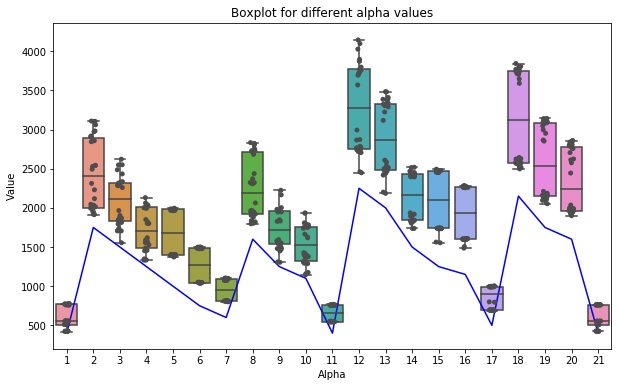

In [25]:
# construct final alpha dataframe
final_alpha_df = pd.DataFrame(final_alpha_list, columns=alpha_name_list)

fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(data=final_alpha_df)
sns.stripplot(data=final_alpha_df, color=".3", size=5)
locs=ax.get_xticks()
ax.plot(locs, alpha_list_true, 'b-')

# label
plt.xlabel('Alpha')
plt.ylabel('Value')
plt.title('Boxplot for different alpha values') 
fig.savefig("Boxplot for different alpha values")   

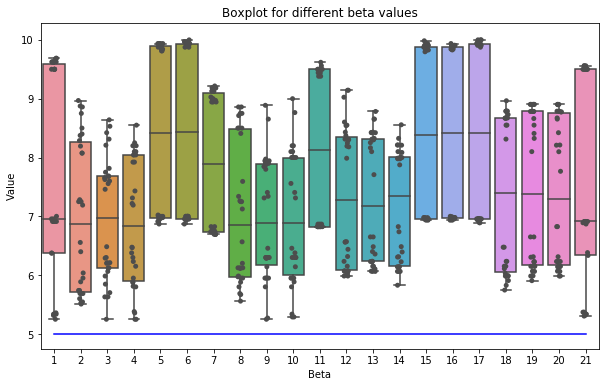

In [26]:
# construct final beta dataframe
final_beta_df = pd.DataFrame(final_beta_list, columns=beta_name_list)

fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(data=final_beta_df)
sns.stripplot(data=final_beta_df, color=".3", size=5)
locs=ax.get_xticks()
ax.plot(locs, beta_list_true, 'b-')

# label
plt.xlabel('Beta')
plt.ylabel('Value')
plt.title('Boxplot for different beta values') 
fig.savefig("Boxplot for different beta values")

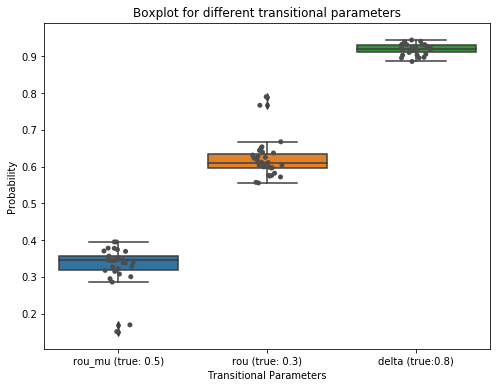

In [28]:
# boxplot of rou_mu (state 1 to state 2), rou (state 1 to state 12), delta (state 11 to state 12) for different start codons
rou_mu = []
rou = []
delta = []
for element in final_trans:
    rou_mu.append(element['AUG'][0])
    rou.append(element['AUG'][1])
    delta.append(element['AUG'][2])

# construct dataframe
final_trans_df = pd.DataFrame({"rou_mu (true: 0.5)":rou_mu, "rou (true: 0.3)":rou,"delta (true:0.8)": delta}, 
                                         columns=['rou_mu (true: 0.5)', 'rou (true: 0.3)', 'delta (true:0.8)'])

fig, ax = plt.subplots(figsize = (8, 6))
sns.boxplot(data=final_trans_df)
sns.stripplot(data=final_trans_df, color=".3", size=5)


plt.xlabel('Transitional Parameters')
plt.ylabel('Probability')
plt.title('Boxplot for different transitional parameters') 
fig.savefig("Boxplot for different transitional parameters")

# Run Viterbi algorithm

In [29]:
from ipynb.fs.full.Viterbi import viterbi_sequence

In [30]:
# calculate number of different number of states
def differ_state(RNA_data, observed_data, alpha_list, beta_list, E, trans, stop_codon_list, state_list_true):
    start = 0
    differ_list = []
    
    for end in range(100, 3001, 100):
        count = 0
        # run viterbi algorithm
        viterbi_output = viterbi_sequence(RNA_data[start:end], observed_data[start:end], 
                                          alpha_list[int(start/100)], beta_list[int(start/100)], 
                                          E[start:end], trans[int(start/100)], stop_codon_list) 
        # true state
        curr_state = state_list_true[start:end]
        # count difference
        for i in range(len(curr_state)):
            for j in range(len(curr_state[i])):
                if viterbi_output[i][j] != curr_state[i][j]:
                    count += 1
        
        differ_list.append(count)
        start += 100
    
    return differ_list

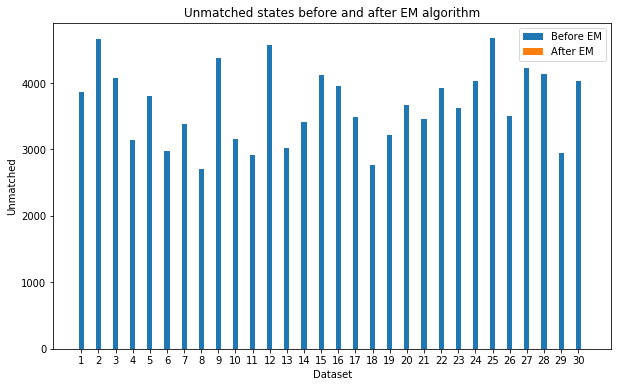

In [46]:
# before and after EM algorithm
before = differ_state(RNA_data, observed_data, start_alpha_list, start_beta_list, E, start_trans, stop_codon_list, state_list_true)
after = differ_state(RNA_data, observed_data, final_alpha_list, final_beta_list, E, final_trans, stop_codon_list, state_list_true)

# plot
fig, ax = plt.subplots(figsize = (10,6))
plt.xticks(np.arange(1, 31, 1))
ind = np.arange(1, 31, 1)
width = 0.3

# label
plt.bar(ind, before, width, label = 'Before EM')
plt.bar(ind + width, after, width, label = 'After EM') 
plt.xlabel('Dataset')
plt.ylabel('Unmatched')
plt.title('Unmatched states before and after EM algorithm') 
plt.legend(loc = 'best')
fig.savefig("Unmatched states before and after EM algorithm")

In [47]:
# percentage of start codons
def percent(RNA_data, observed_data, alpha_list, beta_list, E, trans, stop_codon_list, viterbi_truth, state_list_true, specific_codon):

    start = 0
    output_list = []
    output_codon_num = []
    
    for end in range(100, 3000, 100): 
        
        if viterbi_truth == True:
            viterbi_output = viterbi_sequence(RNA_data[start:end], observed_data[start:end], 
                                          alpha_list[int(start/100)], beta_list[int(start/100)], 
                                          E[start:end], trans[int(start/100)], stop_codon_list)  
        else:
            viterbi_output = state_list_true[start:end]
        
        
        codon_num_list = []
        actual_start_list = []
        for sequence_num in range(len(viterbi_output)):
            start_codon = 0
            actual_start = 0
            
            # find states for start and end
            starts = [j for j, x in enumerate(viterbi_output[sequence_num]) if x == 10]
            ends = [j for j, x in enumerate(viterbi_output[sequence_num]) if x == 2]
            
            # actual number of start codons
            for position in ends:
                if RNA_data[start+sequence_num][position] == specific_codon[0]:
                    actual_start += 1
            actual_start_list.append(actual_start)
            
            starts.insert(0, -1)

            if len(ends) == 0:
                ends.append(len(viterbi_output[sequence_num]) - 4)
                
            pairs = []
            for i in range(len(ends)):
                pairs.append((starts[i]+1, ends[i]))

            # total number of start codons
            for pair in pairs:
                for i in range(pair[0], pair[1]+1):
                    codon = RNA_data[start+sequence_num][i] + RNA_data[start+sequence_num][i+1] + RNA_data[start+sequence_num][i+2]
                    if codon == specific_codon: 
                        start_codon += 1
            codon_num_list.append(start_codon)
        
        # total num of codons for each dataset
        output_codon_num.append(sum(codon_num_list))
        
        # percentage
        output_list.append(sum(actual_start_list)/ sum(codon_num_list)) 
       
        start += 100 
    
    return output_list

In [48]:
actual_percentage_AUG = percent(RNA_data, observed_data, start_alpha_list, start_beta_list, E, start_trans, stop_codon_list, False, state_list_true, 'AUG')
previous_percentage_AUG = percent(RNA_data, observed_data, start_alpha_list, start_beta_list, E, start_trans, stop_codon_list, True, state_list_true, 'AUG')
estimated_percentage_AUG = percent(RNA_data, observed_data, final_alpha_list, final_beta_list, E, final_trans, stop_codon_list, True, state_list_true, 'AUG')

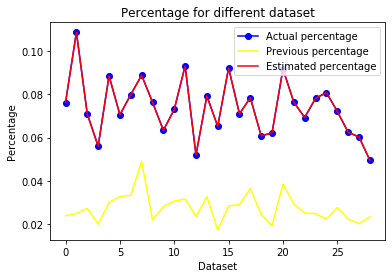

In [49]:
fig, ax = plt.subplots(figsize = (6,4))
plt.plot(actual_percentage_AUG, color = 'blue', marker = 'o', label = 'Actual percentage')
plt.plot(previous_percentage_AUG, color = 'yellow', label = 'Previous percentage')
plt.plot(estimated_percentage_AUG, color = 'red', label = 'Estimated percentage')
plt.legend()
plt.title('Percentage for different dataset')
plt.xlabel('Dataset')
plt.ylabel('Percentage')
plt.show()
fig.savefig("Percentage for different dataset")

# Beta fixed

In [50]:
# multiple initial values
trans_prob = [{'AUG': [0.2, 0.1, 0.3]}, {'AUG': [0.5, 0.2, 0.7]}, {'AUG': [0.8, 0.15, 0.1]}, {'AUG': [0.42, 0.42, 0.5]}]
alpha_list_prob = [np.array([10, 50, 40, 30, 30, 20, 10, 40 , 30, 20, 10, 80, 70, 60, 50, 40 , 30, 60, 50 , 40 , 10]),
            np.array([20, 100, 95, 90, 60, 40, 20, 70 , 66, 50, 10, 200, 180, 150, 100, 90 , 80, 180, 160 , 120 , 10]),
            np.array([1, 150, 110, 90, 50, 30, 10, 100 , 75, 50, 10, 250, 225, 200,150, 100 , 50, 225, 200 , 175, 1])]

In [51]:
final_trans_beta_fixed = []
final_alpha_list_beta_fixed = []

start_trans_beta_fixed = []
start_alpha_list_beta_fixed = []

start = 0
count = 1
for end in range(100, 3001, 100):
    print("count " + str(count))
    
    trans_prob_copy = trans_prob.copy()
    # randomly generate index for trans
    random.seed(end)
    index = random.choice(range(4))
    trans = trans_prob_copy[index]
    start_trans_beta_fixed.append(trans)
    
    # randomly generate index for alpha_list
    random.seed(end+1)
    index = random.choice(range(3))
    alpha_list = alpha_list_prob[index]
    start_alpha_list_beta_fixed.append(alpha_list)
    
    # run EM algorithm
    trans_copy = trans.copy()
    alpha_list_copy = alpha_list.copy()
    
    temp = EM_iter(RNA_data[start:end], observed_data[start:end], E[start:end], trans_copy, alpha_list_copy, 
                   beta_list_true, 10e-10, 100, True, ['UAA', 'UGA', 'UAG'], True)
    final_trans_beta_fixed.append(temp[0])
    final_alpha_list_beta_fixed.append(temp[1])
    
    start = end
    
    count += 1

count 1
[-5572.680095250887]
iteration1
defaultdict(<class 'list'>, {'AUG': [0.203871874316689, 0.7510156883050221, 0.9426570337460456]})
state11
alpha391.8097588532912
state16
alpha1065.773923228806
state13
alpha1598.0830935406354
state1
alpha344.7889875262738
state20
alpha1380.9993985998824
state9
alpha1081.941431024125
state3
alpha1298.4620233899907
state17
alpha556.3475944085283
state19
alpha1494.0160353261501
state6
alpha744.7117320575314
state14
alpha1260.5543770058664
state8
alpha1323.265664366881
state5
alpha1002.602388752925
state4
alpha1103.7760739601722
state10
alpha962.0411760879604
state21
alpha346.35798478066056
state2
alpha1598.1116059530548
state15
alpha1123.662736883253
state12
alpha1769.8546813554806
state18
alpha1932.5715396829316
state7
alpha594.6136326662348
[ 344 1598 1298 1103 1002  744  594 1323 1081  962  391 1769 1598 1260
 1123 1065  556 1932 1494 1380  346]
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
[-5572.680095250887, -166.96115300834

alpha750.01
state4
alpha1155.725662214754
state1
alpha400.0
state10
alpha1015.1673203595354
state3
alpha1494.2278534361255
[ 400 1686 1494 1155  998  750  598 1488 1136 1015  398 2197 1970 1453
 1249 1149  499 1989 1632 1551  398]
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
[-4234.150578993139, -152.28023394560984, -152.28023394560984]
count 5
[-5454.241648725041]
iteration1
defaultdict(<class 'list'>, {'AUG': [0.22089433188691518, 0.7285717780754422, 0.9115667076531936]})
state5
alpha994.1467981982961
state7
alpha593.1774888041689
state21
alpha346.90502276326833
state2
alpha1597.6129154715975
state15
alpha1182.1067968714224
state9
alpha1087.286777419179
state4
alpha1083.1395425803792
state14
alpha1274.968769960247
state1
alpha346.16700666454443
state17
alpha528.0563027759999
state19
alpha1507.475367275093
state13
alpha1596.9004098498588
state6
alpha749.8708870077369
state16
alpha1055.0638218780825
state3
alpha1247.4725880859305
state20
alpha1354.9608618620596
stat

alpha553.5480740282486
state9
alpha1154.2360599668448
state6
alpha739.5749985182301
state3
alpha1363.980373443641
state2
alpha1539.812650556078
state13
alpha1630.8910137170228
state10
alpha1006.7113737491972
state18
alpha1940.7322109244128
state19
alpha1601.8334256609273
state16
alpha1096.6224702937113
state4
alpha1134.3102323189441
state12
alpha1848.7053892468969
state7
alpha593.3776590237402
[ 397 1539 1363 1134  994  739  593 1427 1154 1006  399 1848 1630 1223
 1155 1096  553 1940 1601 1468  399]
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
[-5001.151525758387, -150.795630296583]
iteration2
defaultdict(<class 'list'>, {'AUG': [0.3288193910492791, 0.6252417794970987, 0.9185628742515013]})
state12
alpha2133.6863375025005
state21
alpha399.0
state13
alpha1920.345982296285
state8
alpha1427.0
state18
alpha1961.2099999999994
state2
alpha1605.7065656594218
state4
alpha1134.0
state1
alpha397.0
state3
alpha1384.2100000000005
state5
alpha995.0099999999999
state6
alpha747.21

alpha1026.3092524614747
state11
alpha393.0111615871361
state14
alpha1157.6162051372912
state3
alpha1344.8656314078014
state8
alpha1444.9888719034975
state18
alpha1840.5443983486164
state21
alpha398.4787422007135
state9
alpha1153.303033111887
state20
alpha1364.4178402419166
state4
alpha1125.2821950635837
state17
alpha569.122869058674
state19
alpha1502.6897537565183
state16
alpha1055.4592563685953
state1
alpha399.79717931218664
state7
alpha591.9651148097257
state2
alpha1515.6317008902072
state15
alpha1118.165009898763
state13
alpha1414.9106690269653
state5
alpha992.3667414335083
state12
alpha1679.3010878143295
state6
alpha742.0154883529368
[ 399 1515 1344 1125  992  742  591 1444 1153 1026  393 1679 1414 1157
 1118 1055  569 1840 1502 1364  398]
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
[-4843.143162773243, -153.1203826352391]
iteration2
defaultdict(<class 'list'>, {'AUG': [0.378631720203159, 0.5755725190839702, 0.9105571847507331]})
state14
alpha1450.614230939489


alpha1569.334419453835
state12
alpha2214.9330461326945
[ 397 1599 1346 1166 1002  753  598 1569 1140 1031  401 2214 1958 1463
 1247 1145  502 1967 1708 1518  396]
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
[-7624.8231082861, -232.7544635762436, -198.54450951368173]
iteration3
defaultdict(<class 'list'>, {'AUG': [0.3703323873971085, 0.5824885757840703, 0.9242957746478873]})
state10
alpha1031.0
state13
alpha1958.0
state12
alpha2214.0
state5
alpha1002.0
state8
alpha1569.0
state20
alpha1518.0
state15
alpha1247.0
state14
alpha1463.0
state4
alpha1166.0
state18
alpha1967.0
state11
alpha401.0
state6
alpha753.0
state9
alpha1140.0
state21
alpha397.0099999999997
state17
alpha502.0
state19
alpha1708.0
state7
alpha598.0
state3
alpha1346.0
state1
alpha397.0
state16
alpha1145.0
state2
alpha1599.0
[ 397 1599 1346 1166 1002  753  598 1569 1140 1031  401 2214 1958 1463
 1247 1145  502 1967 1708 1518  397]
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
[-7624.82310

alpha1934.391715671765
state21
alpha397.49075426640974
state8
alpha1561.7049764056871
state2
alpha1592.0
state16
alpha1150.186731673545
state9
alpha1132.2921412259902
state18
alpha1987.6606582237484
state6
alpha751.2749774302551
state7
alpha598.3290163133632
state10
alpha1041.4459548033615
state20
alpha1544.4549689911116
state11
alpha398.4078618948855
state1
alpha399.79709565154633
state14
alpha1486.7146000531986
[ 399 1592 1343 1134  999  751  598 1561 1132 1041  398 2224 1934 1486
 1250 1150  501 1987 1687 1544  397]
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
[-5629.8340767093905, -163.16452547098203, -143.8800485846495]
iteration3
defaultdict(<class 'list'>, {'AUG': [0.3312679746371734, 0.6221302210118337, 0.9315642458100557]})
state2
alpha1592.0
state7
alpha598.0
state16
alpha1150.0
state11
alpha398.0
state4
alpha1134.0
state20
alpha1544.0
state17
alpha501.0
state3
alpha1343.0
state19
alpha1687.0
state12
alpha2224.0
state10
alpha1041.0
state8
alpha1561.0
state

alpha1981.850000000003
state11
alpha399.7901463149911
state16
alpha1151.544960780406
state3
alpha1375.0
state21
alpha398.0
state7
alpha596.2779215200164
state5
alpha997.2505413623109
state17
alpha499.83352682854223
state1
alpha399.0
state8
alpha1450.0
state15
alpha1247.5769476540654
state9
alpha1147.0
state13
alpha1916.9474457729946
state6
alpha753.4904165653481
state20
alpha1468.052085088967
[ 399 1626 1375 1143  997  753  596 1450 1147 1002  399 2116 1916 1468
 1247 1151  499 1981 1626 1468  398]
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
[-5025.253097436126, -154.9206366390731, -154.9206366390731]
count 23
[-3870.979760008197]
iteration1
defaultdict(<class 'list'>, {'AUG': [0.1698111765153134, 0.7672867489794253, 0.9430607507088838]})
state21
alpha398.6791648853644
state18
alpha1976.4417016081584
state6
alpha746.2098520605349
state3
alpha1254.4566605953928
state4
alpha1078.6930749342316
state13
alpha1541.2546486771773
state10
alpha947.6990139417001
state5
alpha

alpha601.3655564363138
[ 395 1593 1436 1139  996  748  601 1560 1125 1047  398 2219 1872 1482
 1249 1149  500 1944 1680 1445  399]
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
[-6496.530151244097, -189.77158720897347, -171.23401223931876]
iteration3
defaultdict(<class 'list'>, {'AUG': [0.3647815875890382, 0.5816140060611705, 0.9023746701847325]})
state7
alpha601.0
state13
alpha1872.0
state18
alpha1944.0
state21
alpha400.00999999999925
state2
alpha1593.0
state15
alpha1249.0
state19
alpha1680.0
state11
alpha398.0
state4
alpha1139.0
state3
alpha1436.0
state17
alpha500.0
state9
alpha1125.0
state14
alpha1482.0
state10
alpha1047.0
state8
alpha1560.0
state12
alpha2219.0
state16
alpha1149.0
state20
alpha1445.0
state5
alpha996.0
state1
alpha395.0
state6
alpha748.0
[ 395 1593 1436 1139  996  748  601 1560 1125 1047  398 2219 1872 1482
 1249 1149  500 1944 1680 1445  400]
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
[-6496.530151244097, -189.77158720897347,

alpha750.3932727015904
state11
alpha391.3651588638508
state19
alpha1438.0354884222922
state10
alpha965.4332311824317
state8
alpha1476.6832541675758
state12
alpha1830.7448719489546
state5
alpha1003.5208192054499
state15
alpha1108.2082066822938
[ 401 1382 1243 1085 1003  750  595 1476 1074  965  391 1830 1636 1228
 1108 1060  567 1884 1438 1380  399]
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
[-4263.028707696474, -161.12078218057556]
iteration2
defaultdict(<class 'list'>, {'AUG': [0.3318496487356653, 0.6177908113391982, 0.9022082018927444]})
state11
alpha399.4162909992857
state17
alpha501.31243452280034
state18
alpha1969.8500000000022
state3
alpha1483.9988901869165
state2
alpha1673.2772042130875
state12
alpha2115.732410125039
state16
alpha1146.3713232810035
state10
alpha1032.7161382906359
state5
alpha1003.0
state13
alpha1925.7834087944502
state4
alpha1152.6461732873388
state8
alpha1476.0
state19
alpha1699.8881913334412
state1
alpha401.0
state7
alpha598.2933032678055

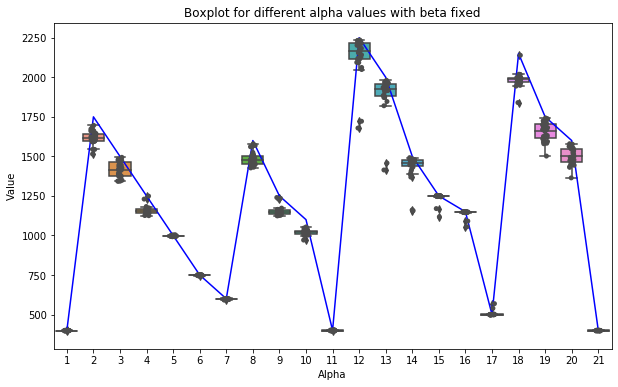

In [52]:
alpha_name_list = []
for i in range(1, 22):
    alpha_name_list.append(str(i))
    

final_alpha_df_beta_fixed = pd.DataFrame(final_alpha_list_beta_fixed, columns=alpha_name_list)


fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(data=final_alpha_df_beta_fixed)
sns.stripplot(data=final_alpha_df_beta_fixed, color = '.3', size = 5)
locs=ax.get_xticks()
ax.plot(locs, alpha_list_true, 'b-')

plt.xlabel('Alpha')
plt.ylabel('Value')
plt.title('Boxplot for different alpha values with beta fixed') 
fig.savefig("Boxplot for different alpha values with beta fixed")

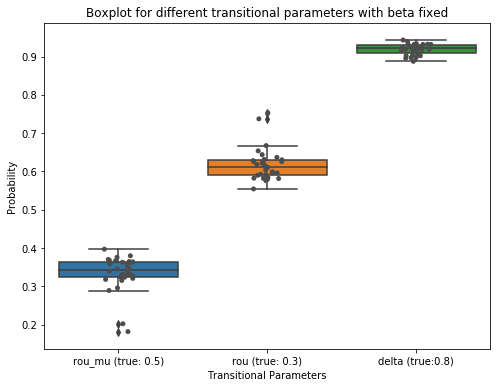

In [53]:
# boxplot of rou_mu (state 1 to state 2), rou (state 1 to state 12), delta (state 11 to state 12) for different start codons
rou_mu_beta_fixed = []
rou_beta_fixed = []
delta_beta_fixed = []
for element in final_trans_beta_fixed:
    rou_mu_beta_fixed.append(element['AUG'][0])
    rou_beta_fixed.append(element['AUG'][1])
    delta_beta_fixed.append(element['AUG'][2])

# construct dataframe
final_trans_df_beta_fixed = pd.DataFrame({"rou_mu (true: 0.5)":rou_mu_beta_fixed, "rou (true: 0.3)":rou_beta_fixed,"delta (true:0.8)": delta_beta_fixed}, 
                                         columns=['rou_mu (true: 0.5)', 'rou (true: 0.3)', 'delta (true:0.8)'])

fig, ax = plt.subplots(figsize = (8, 6))
sns.boxplot(data=final_trans_df_beta_fixed)
sns.stripplot(data=final_trans_df_beta_fixed, color=".3", size=5)


plt.xlabel('Transitional Parameters')
plt.ylabel('Probability')
plt.title('Boxplot for different transitional parameters with beta fixed') 
fig.savefig("Boxplot for different transitional parameters with beta fixed")

# Run Viterbi algorithm

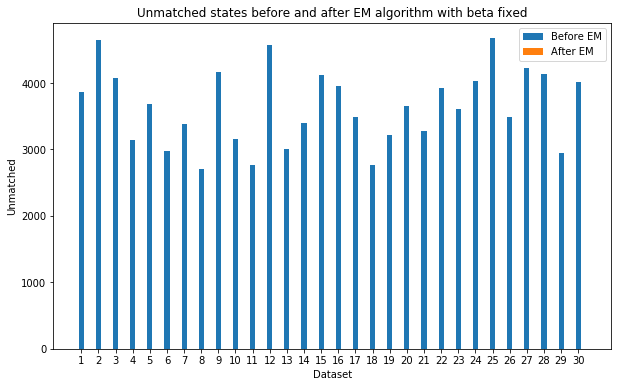

In [54]:
beta_list_beta_fixed = np.repeat([beta_list_true],30, axis = 1).reshape(30,21)

# before and after EM algorithm with beta fixed
before_beta_fixed = differ_state(RNA_data, observed_data, start_alpha_list_beta_fixed, beta_list_beta_fixed, E, start_trans_beta_fixed, stop_codon_list, state_list_true)
after_beta_fixed = differ_state(RNA_data, observed_data, final_alpha_list_beta_fixed, beta_list_beta_fixed, E, final_trans_beta_fixed, stop_codon_list, state_list_true)

# plot with beta fixed
fig, ax = plt.subplots(figsize = (10,6))
plt.xticks(np.arange(1, 31, 1))
ind = np.arange(1, 31, 1)
width = 0.3

# label
plt.bar(ind, before_beta_fixed, width, label = 'Before EM')
plt.bar(ind + width, after_beta_fixed, width, label = 'After EM') 
plt.xlabel('Dataset')
plt.ylabel('Unmatched')
plt.title('Unmatched states before and after EM algorithm with beta fixed') 
plt.legend(loc = 'best')
fig.savefig("Unmatched states before and after EM algorithm with beta fixed")

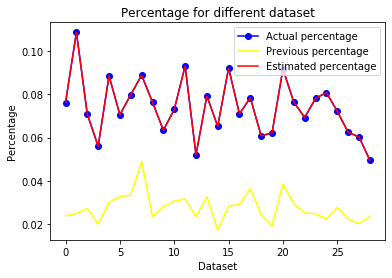

In [55]:
actual_percentage_AUG_beta_fixed = percent(RNA_data, observed_data, start_alpha_list_beta_fixed, beta_list_beta_fixed, E, start_trans_beta_fixed, stop_codon_list, False, state_list_true, 'AUG')
previous_percentage_AUG_beta_fixed = percent(RNA_data, observed_data, start_alpha_list_beta_fixed, beta_list_beta_fixed, E, start_trans_beta_fixed, stop_codon_list, True, state_list_true, 'AUG')
estimated_percentage_AUG_beta_fixed = percent(RNA_data, observed_data, final_alpha_list_beta_fixed, beta_list_beta_fixed, E, final_trans_beta_fixed, stop_codon_list, True, state_list_true, 'AUG')

fig, ax = plt.subplots(figsize = (6,4))
plt.plot(actual_percentage_AUG_beta_fixed, color = 'blue', marker = 'o', label = 'Actual percentage')
plt.plot(previous_percentage_AUG_beta_fixed, color = 'yellow', label = 'Previous percentage')
plt.plot(estimated_percentage_AUG_beta_fixed, color = 'red', label = 'Estimated percentage')
plt.legend()
plt.title('Percentage for different dataset')
plt.xlabel('Dataset')
plt.ylabel('Percentage')
plt.show()
fig.savefig("Percentage for different dataset")